<a href="https://colab.research.google.com/github/mwaoh/Reward-Community-Engagement/blob/main/Reward_Community_Engagemen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis project,Analyzing WhatsApp group chat data to get insights

Data Used is for a group of writers title "Writing & opportunities"

Installing packages and libraries

In [29]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=56a62177d541826f768bdf4491980f943e265ea0719b81aae6608dbf6a8e3a31
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [87]:
#Importing libraries
import re
import regex
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
import emoji
from os import path
from PIL import Image
from nltk import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

#Data Collection
Opening Whatsapp group chat. Go to Settings. Click on Export Chat. Click on without media.
#Writing functions to extract data from the whatsapp text file


In [31]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [32]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

Splitting and extract data from the whatsapp data text file

In [33]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [34]:
from google.colab import files
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
uploaded = files.upload()
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = '/WhatsApp Chat with  Writing & opportunities .txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
                    messageBuffer.append(message)

Saving WhatsApp Chat with  Writing & opportunities .txt to WhatsApp Chat with  Writing & opportunities  (6).txt


In [90]:
# Initialising a pandas Dataframe.
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) 
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
638,2023-01-09,09:18,+254 707 986024,Turntin
639,2023-01-09,09:19,+254 797 773351,Dm availbe
640,2023-01-09,10:00,+254 704 265776,Nipewe hub senior done 1000+ orders. Urgent
641,2023-01-09,10:16,+254 742 123111,𝙼𝚘𝚛𝚗𝚒𝚗𝚐🌞🌞🌞 𝙼𝚘𝚛𝚗𝚒𝚗𝚐🌞🌞🌞 𝙼𝚘𝚛𝚗𝚒𝚗𝚐🌞🌞🌞 𝙼𝚘𝚛𝚗𝚒𝚗𝚐🌞🌞🌞 𝙼𝚘...
642,2023-01-09,10:48,+1 (773) 570-3741,OFFER GET A USA 🇺🇸 NUMBER AT ONLY 250KSH.DM NO...
643,2023-01-09,10:15,+254 704 144463,<Media omitted>
644,2023-01-09,12:50,+254 700 362357,"*Selling Textbroker level 4 US profile, rated,..."
645,2023-01-09,13:13,+254 768 574464,*SELLING* *SELLING* *SELLING* *SELLING* *SELLI...
646,2023-01-09,14:02,+1 (773) 570-3741,OFFER GET A USA 🇺🇸 NUMBER AT ONLY 250KSH.DM NO...
647,2023-01-09,14:18,+254 742 123111,Verblio level 0 @5k 🔥 Verblio level 0 @5k 🔥 Ve...


In [36]:
df.Author.unique()

array([None, '+254 704 968840', '+254 770 807583', '+254 706 406758',
       '+1 (408) 883-8530', '+254 742 123111', '+254 794 126661',
       '+254 700 917700', '+254 796 178487', '+254 720 085347',
       '+254 711 508911', '+254 708 242550', '+254 713 750809',
       '+254 717 713943', '+254 758 142034', '+86 188 2622 0768',
       '+1 (360) 625-9187', '+254 707 583668', '+254 738 321234',
       '+254 708 839603', '+254 743 910431', '+254 727 919068',
       '+254 726 929102', '+254 706 794260', '+254 707 717292',
       '+254 728 498874', '+254 700 545326', '+254 722 128384',
       '+254 748 267422', '+254 728 421904', '+254 742 161881',
       '+254 101230969', '+254 773 278600', '+254 102096805',
       '+254 757 059070', '+254 797 409945', '+254 798 670754',
       '+254 796 051406', '+254 724 532267', '+254 700 395389',
       '+254 768 727615', '+254 757 163149', '+254 790 300009',
       '+254 714 498451', '+254 716 126257', '+254 707 986024',
       '+254 703 527474', '+25

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     658 non-null    datetime64[ns]
 1   Time     658 non-null    object        
 2   Author   578 non-null    object        
 3   Message  658 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.7+ KB


In [85]:
# Initialising a pandas Dataframe for messages.
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 657
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     599 non-null    datetime64[ns]
 1   Time     599 non-null    object        
 2   Author   519 non-null    object        
 3   Message  599 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.4+ KB


In [83]:
# Creates a list of unique Authors - ['0712345678', '0741542443', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  print()
 


Stats of None -
Messages Sent 0
Words per message nan
Media Messages Sent 0

Stats of +254 704 968840 -
Messages Sent 2
Words per message 6.0
Media Messages Sent 0

Stats of +254 770 807583 -
Messages Sent 17
Words per message 19.58823529411765
Media Messages Sent 0

Stats of +254 706 406758 -
Messages Sent 31
Words per message 69.19354838709677
Media Messages Sent 0

Stats of +1 (408) 883-8530 -
Messages Sent 45
Words per message 10.0
Media Messages Sent 0

Stats of +254 742 123111 -
Messages Sent 88
Words per message 32.36363636363637
Media Messages Sent 2

Stats of +254 794 126661 -
Messages Sent 20
Words per message 11.5
Media Messages Sent 0

Stats of +254 700 917700 -
Messages Sent 14
Words per message 74.35714285714286
Media Messages Sent 0

Stats of +254 796 178487 -
Messages Sent 1
Words per message 3.0
Media Messages Sent 0

Stats of +254 720 085347 -
Messages Sent 3
Words per message 13.333333333333334
Media Messages Sent 0

Stats of +254 711 508911 -
Messages Sent 2
Words p

<ipython-input-83-261e8c8bc74b>:12: RuntimeWarning: invalid value encountered in long_scalars
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


Words per message 2.5555555555555554
Media Messages Sent 0

Stats of +254 796 051406 -
Messages Sent 3
Words per message 2.0
Media Messages Sent 2

Stats of +254 714 498451 -
Messages Sent 5
Words per message 6.4
Media Messages Sent 0

Stats of +254 716 126257 -
Messages Sent 1
Words per message 96.0
Media Messages Sent 0

Stats of +254 707 986024 -
Messages Sent 7
Words per message 3.142857142857143
Media Messages Sent 0

Stats of +254 703 527474 -
Messages Sent 2
Words per message 6.0
Media Messages Sent 0

Stats of +254 727 801670 -
Messages Sent 5
Words per message 92.2
Media Messages Sent 0

Stats of +254 770 036594 -
Messages Sent 2
Words per message 8.5
Media Messages Sent 0

Stats of +254 715 988310 -
Messages Sent 1
Words per message 2.0
Media Messages Sent 0

Stats of +254 799 952394 -
Messages Sent 3
Words per message 7.666666666666667
Media Messages Sent 0

Stats of +254 742 499368 -
Messages Sent 1
Words per message 2.0
Media Messages Sent 0

Stats of +254 707 850506 -
Mes

There are 109259 words in all the messages.


(-0.5, 399.5, 199.5, -0.5)

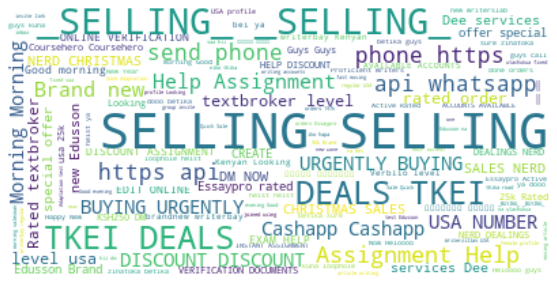

In [86]:
#wordcloud for most talked topics
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

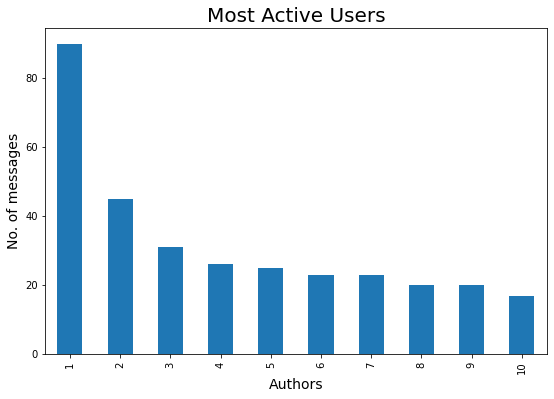

In [91]:
### Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = ['1','2','3','4','5','6','7','8','9','10']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Most Active Users',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()